## 배치 예측

In [1]:
import math
batch_size = 2


def predict_batch(df, batch_size, threshold):
    p_nums = df.shape[0]
    print(p_nums)
    steps =  math.ceil(p_nums / batch_size)
    print(steps)

    predictions = []
    
    for i in range(steps):
        start = i * batch_size
        end = (i+1) * batch_size
        p_df = df[start:end]
        result = predictor.predict(p_df.to_csv(index=False))
        predictions.append(result)
        print(start, end , p_df.shape)
        
        if i == 1:
            break
            
    return predictions

    
predictions = predict_batch(X_test, batch_size=batch_size, threshold=0.8)
predictions

In [3]:
a.split('\n')

AttributeError: 'list' object has no attribute 'split'

## convert int to float

In [ ]:
def change_type(raw_df):
    '''
    test2_data_nolab = change_type(test_data_nolab)  
    '''
    df = raw_df.copy()
    int_columns = df.columns[df.dtypes == 'int64'].tolist()
    for e in int_columns:
        print(e)
        df[e] = df[e].astype('float64')
#    int_index = [num -1 for num in int_index]

    

    return df
    
test2_data_nolab = change_type(test_data_nolab)  
test2_data_nolab.info()

## Label Encoding with Train and TEst

In [7]:
# from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
class LabelEncoderExt(object):
    '''
    Source:
    # https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
    '''
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)

        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
                print("new_data_list: ", new_data_list)

        return self.label_encoder.transform(new_data_list)
    
def make_test_label_encoding(raw_train_df, raw_test_df,cols):
    train_df = raw_train_df.copy()
    test_df = raw_test_df.copy()
    
    for lb_col in cols:
        print(lb_col)
        le = LabelEncoderExt()
        le = le.fit(train_df[lb_col])
        
        train_en = le.transform(train_df[lb_col])
        test_en = le.transform(test_df[lb_col])        
        lb_col_name = 'lb_' + lb_col
        print("new col name: ", lb_col_name)
        train_df[lb_col_name] = train_en
        test_df[lb_col_name] = test_en        
    
    return train_df, test_df




In [8]:
import pandas as pd
train_pd = pd.DataFrame({"col1": ['a','b','c']})
test_pd = pd.DataFrame({"col1": ['a','a','b','d','e']})
train_pd

,col1
0,a
1,b
2,c


In [9]:
label_cols = ['col1']
train_pd_lb, test_pd_lb = make_test_label_encoding(train_pd, test_pd, label_cols)

col1
new_data_list:  ['a', 'a', 'b', 'Unknown', 'e']
new_data_list:  ['a', 'a', 'b', 'Unknown', 'Unknown']
new col name:  lb_col1


In [10]:
train_pd_lb, test_pd_lb # Unknown == 0

(  col1  lb_col1
 0    a        1
 1    b        2
 2    c        3,
   col1  lb_col1
 0    a        1
 1    a        1
 2    b        2
 3    d        0
 4    e        0)

## Install PrettyTable

In [104]:
pip install PrettyTable

  Using cached prettytable-2.0.0-py3-none-any.whl (22 kB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [105]:
from prettytable import PrettyTable
from timeit import default_timer as timer

## BYOC Function

In [30]:
import autogluon as ag
import pandas as pd
import os

In [31]:
# import autogluon.core as ag
# from autogluon.tabular import TabularPrediction as task
import autogluon
from autogluon.tabular import TabularPrediction as task
from autogluon.tabular import TabularDataset

In [35]:
%store -r no_auto_train_file

In [56]:
def __load_input_data(path: str):
    """
    Load training data as dataframe
    :param path:
    :return: DataFrame
    """
    input_data_files = os.listdir(path)
    try:
        input_dfs = [pd.read_csv(f'{path}/{data_file}') for data_file in input_data_files]
        return task.Dataset(df=pd.concat(input_dfs))
    except:
        print(f'No csv data in {path}!')
        return None



In [58]:
folder_name = '/'.join(no_auto_train_file.split('/')[0:-1])
train_data = __load_input_data(folder_name)


In [60]:
import pickle 

columns = train_data.columns.tolist()
column_dict = {"columns":columns}
with open('columns.pkl', 'wb') as f:
    pickle.dump(column_dict, f)
print(column_dict)    



{'columns': ['classes', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'price', 'freight_value', 'product_weight_g', 'product_category_name_english', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'order_weekday', 'order_day', 'order_month', 'customer_seller_state', 'customer_seller_city', 'customer_seller_zip_code_prefix', 'product_volume']}


## Parser Test

In [78]:
fit_args = {
  'label': 'y',
  # Adding 'best_quality' to presets list will result in better performance (but longer runtime)
  'presets': ['optimize_for_deployment'],
}

fit_args="test"

In [102]:
! python working/z_parse.py --fit_args 'label' --feature_importance True
# ! python working/z_parse.py --fit_args label=classes --feature_importance True
# ! python working/z_parse.py --feature_importance True

feature_importance: True
fit_args: label


## docker commnd

docker stop `docker ps -q`

## MXNet Model 생성 

In [ ]:
## 모델 결과 파일 저장
model_artifact='s3://{}/{}/output/model.tar.gz'.format(bucket, train_byos_job_name)
print('model_artifact: ', model_artifact)                                                                                                              

# training_image, inferene_image 가 동일
inference_image = '763104351884.dkr.ecr.{}.amazonaws.com/mxnet-training:1.6.0-cpu-py3'.format(region)

mxnet_model = MXNetModel(
    # entry_point = 'src/autogluon_inference.py',
    entry_point = 'src/autogluon_train.py',    
    framework_version='1.6.0',
    py_version='py3',
    model_data = model_artifact,
    role = role,    
)

## os command in Python

In [21]:
import os, subprocess
# subprocess.run(['ls','-l'])
subprocess.check_output(["ls", "-l", "/dev/null"])

b'crw-rw-rw- 1 root root 1, 3 Oct 25 14:06 /dev/null\n'

In [13]:
import os

cmd = 'ls -l'
r = os.system(cmd)
r

0

## 글루온 모델 결과 다운로드

In [8]:
import tarfile
import sagemaker

def download_extact_infer_file(s3_output_path, output_infer_folder, zip_file_name='model.tar.gz'):
    sagemaker.s3.S3Downloader.download(s3_output_path, output_infer_folder)
    output_infer_path = os.path.join(output_infer_folder,zip_file_name )
    tf = tarfile.open(output_infer_path)
    print("Infer file {} is downloaded".format(output_infer_path))
    tf.extractall(path = output_infer_folder)
    print("Infer file {} is extracted".format(output_infer_path))    

import os
output_folder = 'ZTEST/model_artifact'
os.makedirs(output_folder, exist_ok=True)

s3_model_output = 's3://code-free-automl-gsmoon/results/auto-autogluon-2020-11-13-07-48-33-054/output/model.tar.gz'
download_extact_infer_file(s3_model_output, output_folder)

Infer file ZTEST/model_artifact/model.tar.gz is downloaded
Infer file ZTEST/model_artifact/model.tar.gz is extracted


# Target encoding, the right way
    - https://www.kaggle.com/c/ieee-fraud-detection/discussion/108311

### Target Encoding with Smoothing
- Python target encoding for categorical features
    - https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
    - Data
        - https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "ZTEST"]).decode("utf8"))

test.csv
train.csv



In [7]:
# reading data
trn_df = pd.read_csv("ZTEST/train.csv", index_col=0)
sub_df = pd.read_csv("ZTEST/test.csv", index_col=0)



In [10]:
from IPython.display import display
display(trn_df.head())
display(sub_df.head())

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [14]:
trn_df.nunique()[['target','ps_car_11_cat']]

target             2
ps_car_11_cat    104
dtype: int64

In [17]:
from IPython.display import display

In [22]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
#    display(averages)
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # display(smoothing)
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    display(averages)    
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [23]:
# Target encode ps_car_11_cat
trn, sub = target_encode(trn_df["ps_car_11_cat"], 
                         sub_df["ps_car_11_cat"], 
                         target=trn_df.target, 
                         min_samples_leaf=100,
                         smoothing=10,
                         noise_level=0.01)
trn.head(10)

,target
ps_car_11_cat,
1,0.040528
2,0.037995
3,0.051177
4,0.060777
5,0.041956
...,...
100,0.052418
101,0.038289
102,0.033761


id
7     0.038739
9     0.023959
13    0.031294
16    0.045069
17    0.026528
19    0.045044
20    0.022853
22    0.030740
26    0.034516
28    0.044034
Name: ps_car_11_cat_mean, dtype: float64

In [16]:
sub.head(10)

id
0     0.031016
1     0.026561
2     0.035981
3     0.034763
4     0.038041
5     0.027911
6     0.026007
8     0.027007
10    0.044523
11    0.044714
Name: ps_car_11_cat_mean, dtype: float64

Text(0, 0.5, 'Noisy target encoding')

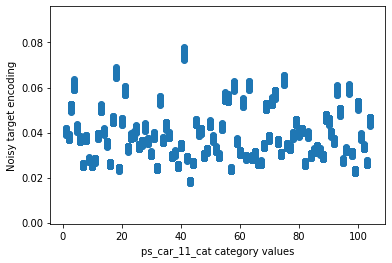

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(trn_df["ps_car_11_cat"], trn)
plt.xlabel("ps_car_11_cat category values")
plt.ylabel("Noisy target encoding")

### K-fold target encoding
- https://github.com/pourya-ir/Medium/blob/master/K-fold-target-enc/K-fold-Target-Encoding.ipynb

In [25]:
import pandas as pd
import numpy as np
from sklearn import base
from sklearn.model_selection import KFold

In [26]:
def getRandomDataFrame(data, numCol):
    
    if data== 'train':
    
        key = ["A" if x ==0  else 'B' for x in np.random.randint(2, size=(numCol,))]
        value = np.random.randint(2, size=(numCol,))
        df = pd.DataFrame({'Feature':key, 'Target':value})

        return df
    
    elif data=='test':
        
        key = ["A" if x ==0  else 'B' for x in np.random.randint(2, size=(numCol,))]
        df = pd.DataFrame({'Feature':key})

        return df
    else:
        print(';)')

In [29]:
train = pd.read_csv('ZTEST/train.csv')
test = pd.read_csv('ZTEST/test.csv')

In [30]:
train = getRandomDataFrame('train',20)
test = getRandomDataFrame('test',5)

In [31]:
train

,Feature,Target
0,B,0
1,A,1
2,B,1
3,A,1
4,B,1
5,A,0
6,B,1
7,A,1
8,B,1
9,A,1


In [32]:
train.groupby('Feature').mean()

,Target
Feature,
A,0.545455
B,0.666667


In [33]:
test

,Feature
0,B
1,A
2,A
3,B
4,B


In [34]:
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames,targetName,n_fold=5,verbosity=True,discardOriginal_col=False):

        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self


    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state=2019)



        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
#             print(tr_ind,val_ind)
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())

        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:

            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,
                                                                                      self.targetName,
                                                                                      np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
            

        return X

In [35]:
targetc = KFoldTargetEncoderTrain('Feature','Target',n_fold=5)
new_train = targetc.fit_transform(train)

Correlation between the new feature, Feature_Kfold_Target_Enc and, Target is -0.6181635950972775.


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [36]:
new_train

,Feature,Target,Feature_Kfold_Target_Enc
0,B,0,0.714286
1,A,1,0.444444
2,B,1,0.714286
3,A,1,0.444444
4,B,1,0.571429
5,A,0,0.555556
6,B,1,0.571429
7,A,1,0.555556
8,B,1,0.625000
9,A,1,0.625000


In [37]:
train[['Feature','Target']].iloc[4:20,:].groupby('Feature').mean()

,Target
Feature,
A,0.444444
B,0.714286


In [38]:
train[['Feature','Target']].groupby('Feature').mean()

,Target
Feature,
A,0.545455
B,0.666667


In [39]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
        
    def fit(self, X, y=None):
        return self

    def transform(self,X):


        mean = self.train[[self.colNames,self.encodedName]].groupby(self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]

        
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})

        return X

In [40]:
test_targetc = KFoldTargetEncoderTest(new_train,'Feature','Feature_Kfold_Target_Enc')
test_targetc.fit_transform(test)

,Feature,Feature_Kfold_Target_Enc
0,B,0.672619
1,A,0.554293
2,A,0.554293
3,B,0.672619
4,B,0.672619
